<a href="https://colab.research.google.com/github/caltunay/for_fun_EDAs/blob/master/google_apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))


n = 5
apps.sample(n)

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4099,5048,AppFinder by AppTap,TOOLS,2.0,2221,4.9M,"5,000,000+",Free,0,Everyone,Tools,"October 3, 2017",1.8.2.7,5.0 and up
3377,4263,J. Cole Rapper Wallpaper HD,PERSONALIZATION,4.1,8,3.1M,"1,000+",Free,0,Everyone,Personalization,"January 11, 2018",1.0,4.1 and up
4884,5871,AZ Lottery Players Club,FAMILY,4.2,97,8.9M,"10,000+",Free,0,Everyone,Entertainment,"July 9, 2018",2.0.0(9),4.0.3 and up
7371,8465,3D DJ – Music Mixer with Virtual DJ,FAMILY,4.3,796,28M,"100,000+",Free,0,Everyone,Entertainment,"July 3, 2018",6.6.8,5.0 and up
457,527,Sugar Daddy Dating App,DATING,2.5,277,5.7M,"100,000+",Free,0,Mature 17+,Dating,"December 4, 2017",3.0.0,4.1 and up


## Data cleaning

In [0]:
# List of characters to remove
chars_to_remove = ['+', ',', 'M', '$']

# List of column names to clean
cols_to_clean = 'Installs Size Price'.split()

# Loop for each column
for col in cols_to_clean:

    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col]) 

## Exploring app categories

In [0]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


## Distribution of app ratings


In [0]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating'],
        xbins = {'start': 1, 'size': 0.1, 'end' : 5}
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


## Size and price of an app


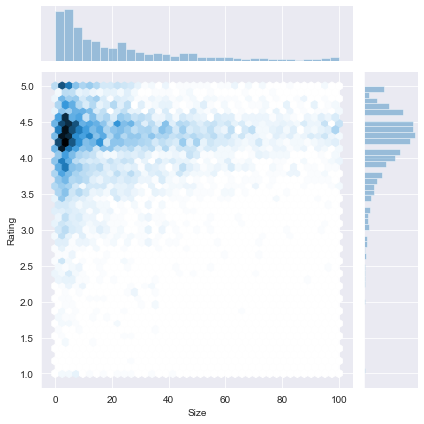

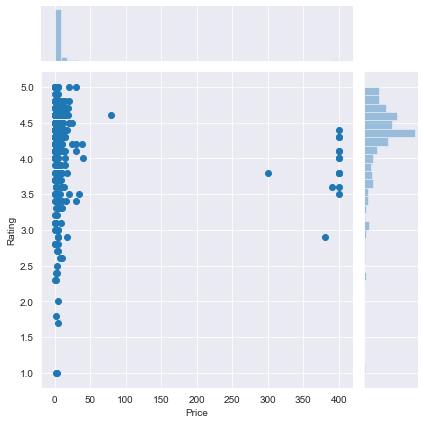

In [0]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# Subset out apps whose type is 'Paid'
paid_apps = apps[apps['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps['Rating'])

## Relation between app category and app price


,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


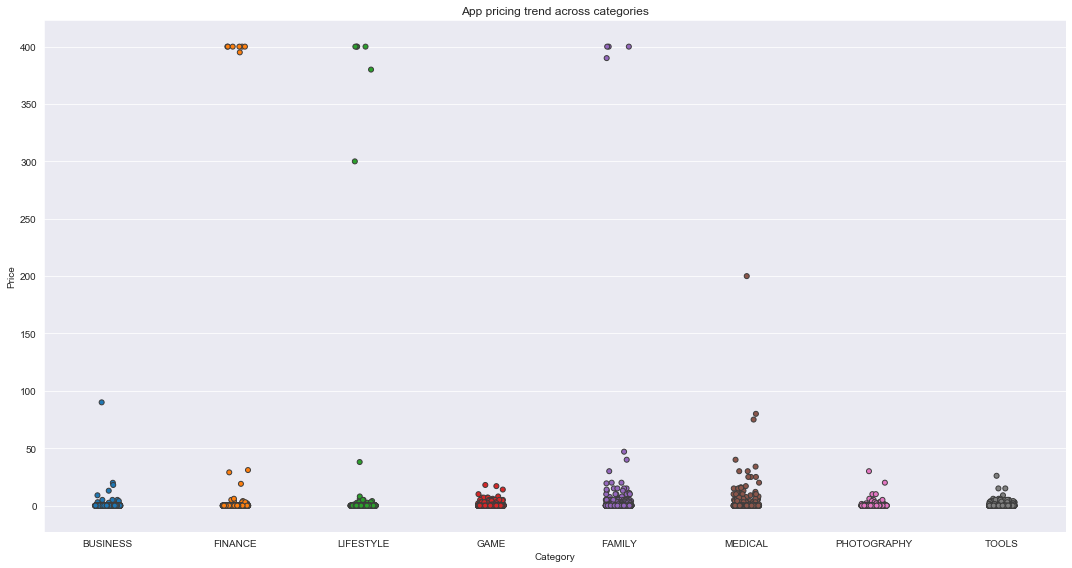

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Category'], y = popular_app_cats['Price'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

## Filter out "junk" apps

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

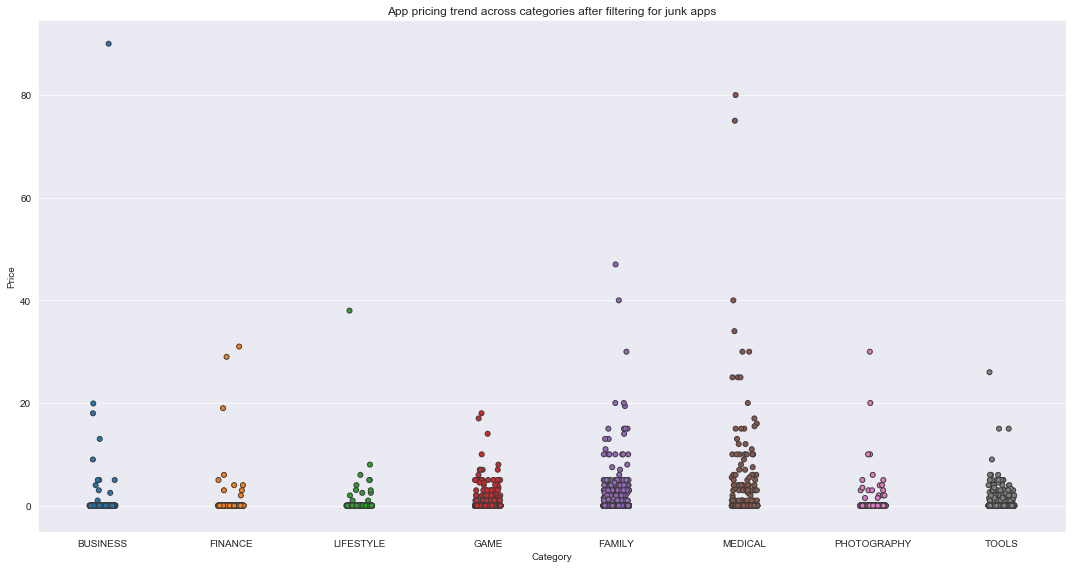

In [0]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15,8)

ax = sns.stripplot(x = apps_under_100['Category'], y= apps_under_100['Price'], jitter=True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## Popularity of paid apps vs free apps


In [0]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})